# 로지스틱 회귀 (Logistic Regression)

* 로지스틱 회귀는 이름에 회귀라는 단어가 들어가지만, 가능한 클래스가 2개인 이진 분류를 위한 모델
* 로지스틱 회귀의 예측 함수 정의

\begin{equation}
\sigma(x) = \frac{1}{1 + e^{-x}} \\
\hat{y} = \sigma(w_0 + w_1 x_1 + ... + w_p x_p)
\end{equation}

  + $\sigma$: 시그모이드 함수
  
* 로지스틱 회귀 모델은 선형 회귀 모델에 시그모이드 함수를 적용

* 로지스틱 회귀의 학습 목표는 다음과 같은 목적 함수를 최소화 하는 파라미터 $w$를 찾는 것

\begin{equation}
BinaryCrossEntropy = -\frac{1}{N}\sum_{i=1}^{N}y_i\log(\hat{y}_i) + (1-y_i)\log(1-\hat{y}_i)
\end{equation}

## 로지스틱 회귀 예제

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.use(['seaborn-whitegrid'])

In [3]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression

In [6]:
samples = 1000
X, y = make_classification(n_samples = samples, n_features = 2,
                          n_informative = 2, n_redundant = 0,
                          n_clusters_per_class = 1)

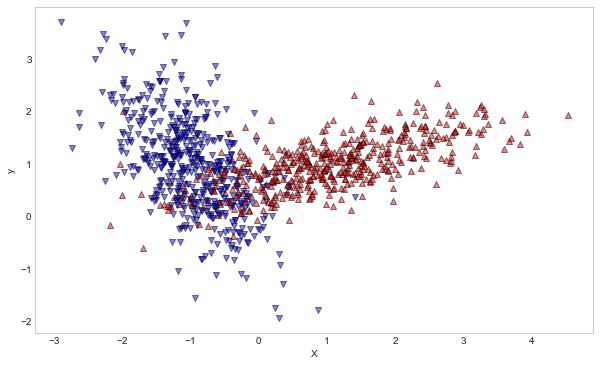

In [9]:
flg, ax = plt.subplots(1, 1, figsize = (10, 6))

ax.grid()
ax.set_xlabel('X')
ax.set_ylabel('y')

for i in range(samples) :
    if y[i] == 0:
        ax.scatter(X[i, 0], X[i, 1], edgecolors = 'k', alpha = .5, marker = '^', color = 'r')
    else :
        ax.scatter(X[i, 0], X[i, 1], edgecolors = 'k', alpha = .5, marker = 'v', color = 'b')

plt.show()

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

In [20]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [21]:
print('학습 데이터 점수 : {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수 : {}'.format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.88875
평가 데이터 점수 : 0.875


In [22]:
scores = cross_val_score(model, X, y, scoring = 'accuracy', cv = 10)
print('CV 평균 점수 : {}'.format(scores.mean()))

CV 평균 점수 : 0.8859999999999999


In [23]:
model.intercept_, model.coef_

(array([-0.47192173]), array([[-2.66350619, -0.18091466]]))

<ipython-input-27-108d4d1f9930>:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap = plt.cm.Pastel1)


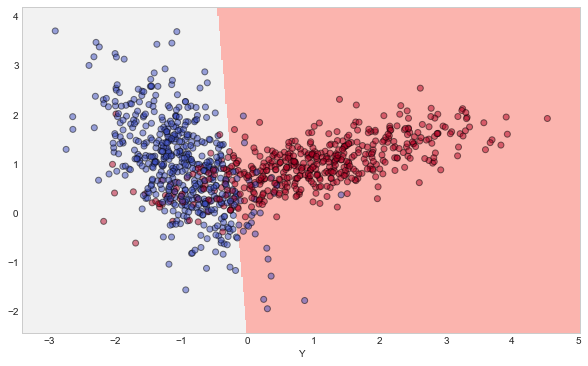

In [27]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1, figsize = (10, 6))
plt.pcolormesh(xx, yy, Z, cmap = plt.cm.Pastel1)

plt.scatter(X[:, 0], X[:, 1], c = np.abs(y-1), edgecolors = 'k',
          alpha = .5, cmap = plt.cm.coolwarm)
plt.xlabel('X')
plt.xlabel('Y')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks()
plt.yticks()

plt.show();

## 붓꽃 데이터

In [29]:
from sklearn.datasets import load_iris

iris = load_iris()
print(iris.keys())
print(iris.DESCR)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1

![iris.png](https://drive.google.com/uc?id=1M-rZSCsgOylvAq82HwPdmn2MikZeDQ9a)

In [30]:
import pandas as pd

iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
species = pd.Series(iris.target, dtype = 'category')
species = species.cat.rename_categories(iris.target_names)
iris_df['species'] = species

In [32]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


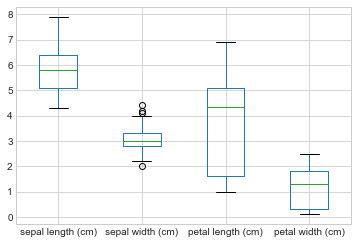

In [33]:
iris_df.boxplot();

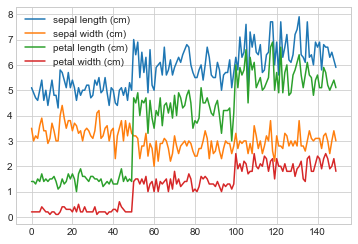

In [34]:
iris_df.plot();

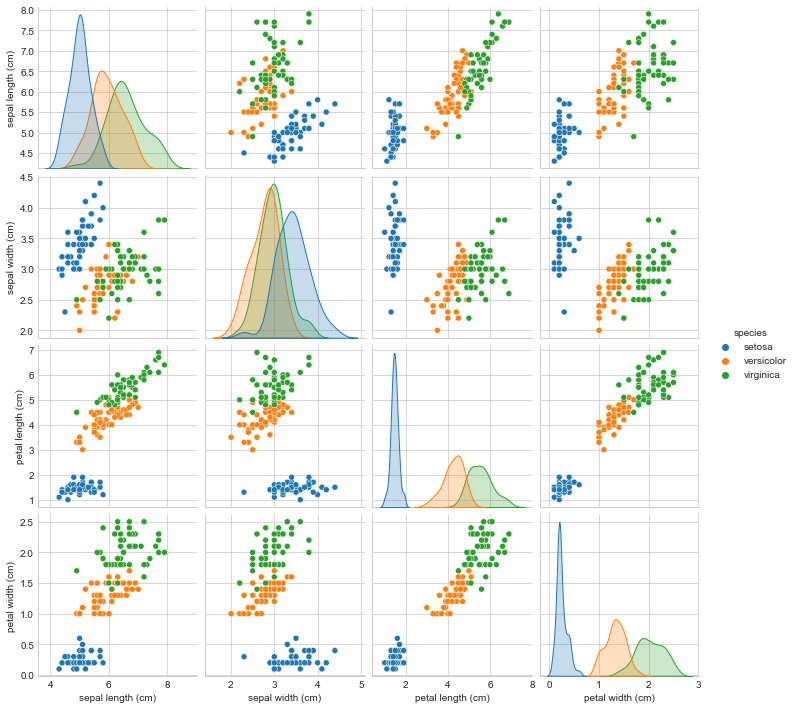

In [36]:
import seaborn as sns

sns.pairplot(iris_df, hue = 'species');

## 붓꽃 데이터에 대한 로지스틱 회귀

In [39]:
X_train, X_test, y_train, y_test = train_test_split(iris.data[:, [2, 3]], iris.target, test_size = .2,
                                                   random_state = 1, stratify = iris.target)

In [40]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver = 'lbfgs', multi_class = 'auto', C = 100.0, random_state = 1)
model.fit(X_train, y_train)

LogisticRegression(C=100.0, random_state=1)

In [41]:
print('학습 데이터 점수 : {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수 : {}'.format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.9666666666666667
평가 데이터 점수 : 0.9666666666666667


In [43]:
X = np.vstack((X_train, X_test))
y = np.hstack((y_train, y_test))

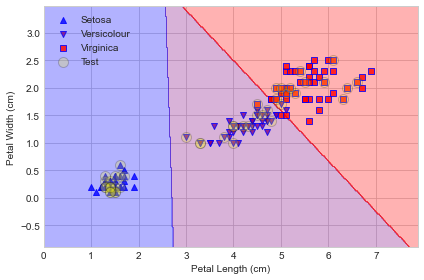

In [50]:
from matplotlib.colors import ListedColormap

x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, .02),
                      np.arange(x2_min, x2_max, .02))
Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
species = ('Setosa', 'Versicolour', 'Virginica')
markers = ('^', 'v', 's')
colors = ('blue', 'purple', 'red')
cmap = ListedColormap(colors[:len(np.unique(y))])
plt.contourf(xx1, xx2, Z, alpha = .3, cmap = cmap)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())

for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1],
               alpha = .8, c = colors[idx],
               marker = markers[idx], label = species[cl],
               edgecolor = 'b')
    
X_comb_test, y_comb_test = X[range(105, 150), :], y[range(105, 150)]
plt.scatter(X_comb_test[:, 0], X_comb_test[:, 1],
           c = 'yellow', edgecolor = 'k', alpha = .2,
           linewidth = 1, marker = 'o',
           s = 100, label = 'Test')

plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend(loc = 'upper left')
plt.tight_layout();

In [53]:
import multiprocessing
from sklearn.model_selection import GridSearchCV

param_grid = [{'penalty' : ['l1', 'l2'],
              'C' : [2.0, 2.2, 2.4, 2.6, 2.8]}]

gs = GridSearchCV(estimator = LogisticRegression(), param_grid = param_grid,
                 scoring = 'accuracy', cv = 10, n_jobs = multiprocessing.cpu_count())
gs

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=4,
             param_grid=[{'C': [2.0, 2.2, 2.4, 2.6, 2.8],
                          'penalty': ['l1', 'l2']}],
             scoring='accuracy')

In [54]:
result = gs.fit(iris.data, iris.target)

D:\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.97333333        nan 0.97333333        nan 0.98
        nan 0.98              nan 0.98      ]
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:
print(gs.best_estimator_)
print('최적 점수 : {}'.format(gs.best_score_))
print('최적 파라미터 : {}'.format(gs.best_params_))
pd.DataFrame(result.cv_results_)

LogisticRegression(C=2.4)
최적 점수 : 0.9800000000000001
최적 파라미터 : {'C': 2.4, 'penalty': 'l2'}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000336,0.000429,0.000000,0.000000,2.0,l1,"{'C': 2.0, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
1,0.056923,0.012205,0.000719,0.000468,2.0,l2,"{'C': 2.0, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,0.933333,0.933333,1.0,1.0,1.0,0.973333,0.032660,4
2,0.000288,0.000381,0.000000,0.000000,2.2,l1,"{'C': 2.2, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
3,0.046637,0.002924,0.000478,0.000396,2.2,l2,"{'C': 2.2, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,0.933333,0.933333,1.0,1.0,1.0,0.973333,0.032660,4
4,0.000300,0.000399,0.000000,0.000000,2.4,l1,"{'C': 2.4, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
5,0.045539,0.004084,0.000460,0.000468,2.4,l2,"{'C': 2.4, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,1.000000,0.933333,1.0,1.0,1.0,0.980000,0.030551,1
6,0.000332,0.000721,0.000000,0.000000,2.6,l1,"{'C': 2.6, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
7,0.043917,0.007015,0.000645,0.000381,2.6,l2,"{'C': 2.6, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,1.000000,0.933333,1.0,1.0,1.0,0.980000,0.030551,1
8,0.000515,0.000500,0.000000,0.000000,2.8,l1,"{'C': 2.8, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
9,0.045448,0.006568,0.000671,0.000448,2.8,l2,"{'C': 2.8, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,1.000000,0.933333,1.0,1.0,1.0,0.980000,0.030551,1


## 유방암 데이터

In [56]:
from sklearn.datasets import load_breast_cancer

In [57]:
cancer = load_breast_cancer()
print(cancer.keys())
print(cancer.DESCR)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were c

In [58]:
cancer_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
cancer_df['Target'] = cancer.target
cancer_df.tail(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [59]:
cancer_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


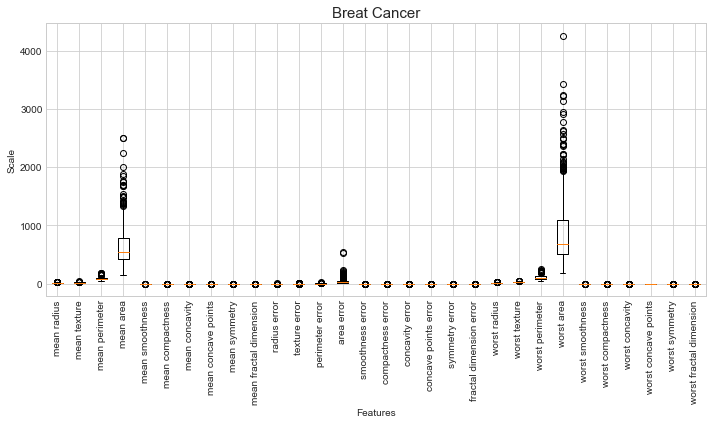

In [60]:
fig = plt.figure(figsize = [10, 6])
plt.title('Breat Cancer', fontsize = 15)
plt.boxplot(cancer.data)
plt.xticks(np.arange(30) + 1, cancer.feature_names, rotation = 90)
plt.xlabel('Features')
plt.ylabel('Scale')
plt.tight_layout();

## 유방암 데이터에 대한 로지스틱 회귀

In [61]:
X, y = load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [62]:
model = LogisticRegression(max_iter = 3000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=3000)

In [63]:
print('학습 데이터 점수 : {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수 : {}'.format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.9553990610328639
평가 데이터 점수 : 0.965034965034965


# 확률적 경사 하강법 (Stochastic Gradient Descent)

* 모델을 학습 시키기 위한 간단한 방법
* 학습 파라미터에 대한 손실 함수의 기울기를 구해 기울기가 최소화 되는 방향으로 학습

\begin{equation}
\frac{\partial L}{\partial w} = \underset{h \rightarrow 0}{lim} \frac{L(w+h) - L(w)}{h} \\
w^{'} = w - \alpha \frac{\partial L}{\partial w}
\end{equation}

* scikit-learn에서는 선형 SGD 회귀와 SGD 분류를 지원

## SGD를 사용한 선형 회귀 분석

In [64]:
from sklearn.linear_model import SGDRegressor
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [65]:
X, y = load_boston(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [66]:
model = make_pipeline(StandardScaler(), SGDRegressor(loss = 'squared_loss'))
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [67]:
print('학습 데이터 점수 : {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수 : {}'.format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.7176227936213737
평가 데이터 점수 : 0.7907170863960288


## 붓꽃 데이터에 대한 SGD 분류

In [68]:
from sklearn.linear_model import SGDClassifier

In [75]:
X, y = load_iris(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [76]:
model = make_pipeline(StandardScaler(), SGDClassifier(loss = 'log'))   # 로지스틱을 수행하겠다는거(SVM 이 아니라)
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier(loss='log'))])

In [77]:
print('학습 데이터 점수 : {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수 : {}'.format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.9732142857142857
평가 데이터 점수 : 0.868421052631579


## 유방암 데이터에 대한 SGD 분류

In [78]:
X, y = load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [79]:
model = make_pipeline(StandardScaler(), SGDClassifier(loss = 'log'))
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier(loss='log'))])

In [80]:
print('학습 데이터 점수 : {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수 : {}'.format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.9741784037558685
평가 데이터 점수 : 0.9790209790209791
